In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

In [2]:
movie  = pd.read_csv("C:/Users/Acer/Downloads/movie.csv")

In [3]:
movie.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
movie.shape

(40000, 2)

In [5]:
movie.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


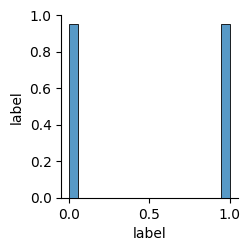

In [6]:
sns.pairplot(movie)

In [7]:
#doing eda 

In [8]:
movie.nunique()

text     39723
label        2
dtype: int64

In [9]:
print(movie.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool


In [10]:
movie.drop_duplicates(inplace = True)

In [11]:
movie.shape

(39723, 2)

In [12]:
label_count = movie['label'].value_counts()

In [13]:
print(label_count)

label
1    19908
0    19815
Name: count, dtype: int64


In [14]:
movie['rev_len'] = movie['text'].apply(len)
print(movie['rev_len'])

0         874
1        1811
2         983
3         351
4         983
         ... 
39995    3111
39996     291
39997    1092
39998    1045
39999     727
Name: rev_len, Length: 39723, dtype: int64


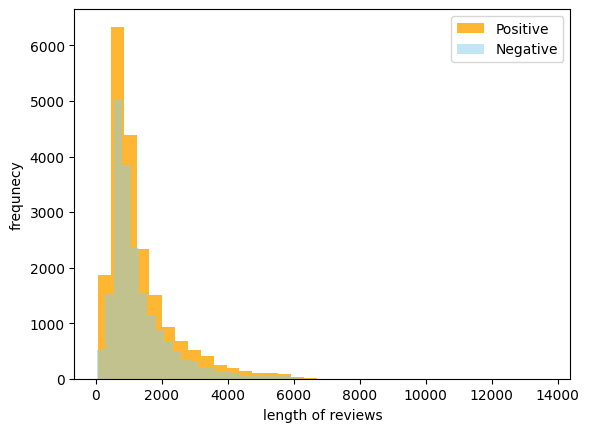

In [15]:
#plotting the graph
positive_reviews = movie[movie['label'] == 1]['rev_len']
negative_reviews = movie[movie['label'] == 0]['rev_len']
plt.hist(positive_reviews, bins=35, alpha=0.8, color='orange', label='Positive')
plt.hist(negative_reviews, bins=35, alpha=0.5, color='skyblue', label='Negative')
plt.xlabel("length of reviews")
plt.ylabel("frequnecy")
plt.legend(loc = 'upper right')

In [16]:
#Data preprocesing

In [17]:
#lowercasing the text
movie['text'] = movie['text'].str.lower()

In [18]:
#removing html tags and url

def removal_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)
def removal_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',text)

In [19]:
movie['text']=movie['text'].apply(removal_html_tags)
movie['text']=movie['text'].apply(removal_url)

In [20]:
movie.head()

,text,label,rev_len
0,i grew up (b. 1965) watching and loving the th...,0,874
1,"when i put this movie in my dvd player, and sa...",0,1811
2,why do people who do not know what a particula...,0,983
3,even though i have great interest in biblical ...,0,351
4,im a die hard dads army fan and nothing will e...,1,983


In [21]:
#removing punctuation
def removal_punc(text):
    return text.translate(str.maketrans('', '', string.punctuation))

In [22]:
movie['text']=movie['text'].apply(removal_punc)

In [23]:
movie['text'][200]

'i love his martial arts style it is quick close up and oh so fast but it seems like his movies are becoming more and more crime based lifestyle quality and less meaningi thought he was out to bring forth a deeper message at least some of the movies had a hidden meaning or agenda this one had some good redeeming qualities of the character but the rest was so far off i was very disappointed the martial arts is also suffering i am hoping to see a more devoted segal in his future films this movie also lacks in keeping the story line going there are too many gaps so the thought is lost too many things are cryptic without a solution'

In [24]:
#removing emojis

In [25]:
import re
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags = re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [26]:
movie['text'] = movie['text'].apply(remove_emojis)
movie.head()

,text,label,rev_len
0,i grew up b 1965 watching and loving the thund...,0,874
1,when i put this movie in my dvd player and sat...,0,1811
2,why do people who do not know what a particula...,0,983
3,even though i have great interest in biblical ...,0,351
4,im a die hard dads army fan and nothing will e...,1,983


In [27]:
#removing stopwords

In [28]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
from nltk.corpus import stopwords

In [30]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
from nltk.tokenize import word_tokenize
# Function to remove stopwords from a given text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    new_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(new_text)


In [32]:
movie['text'] = movie['text'].apply(remove_stopwords)

In [33]:
movie.head()

,text,label,rev_len
0,grew b 1965 watching loving thunderbirds mates...,0,874
1,put movie dvd player sat coke chips expectatio...,0,1811
2,people know particular time past like feel nee...,0,983
3,even though great interest biblical movies bor...,0,351
4,im die hard dads army fan nothing ever change ...,1,983


In [34]:
movie['text'][200]
movie.head()

,text,label,rev_len
0,grew b 1965 watching loving thunderbirds mates...,0,874
1,put movie dvd player sat coke chips expectatio...,0,1811
2,people know particular time past like feel nee...,0,983
3,even though great interest biblical movies bor...,0,351
4,im die hard dads army fan nothing ever change ...,1,983


In [35]:
#Doing Stemming 

In [36]:
from nltk.stem.porter import PorterStemmer

In [37]:
def stemming(text):
    ps = PorterStemmer()
    word_tokens = word_tokenize(text)
    new_text= [ps.stem(word) for word in word_tokens]
    return ' '.join(new_text)

In [38]:
movie['text'] = movie['text'].apply(stemming)

# Doing Lemmetization

In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [40]:

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)




In [41]:
movie['text'] = movie['text'].apply(lemmatize_text)

In [42]:
movie.head()

,text,label,rev_len
0,grew b 1965 watch love thunderbird mate school...,0,874
1,put movi dvd player sat coke chip expect hope ...,0,1811
2,peopl know particular time past like feel need...,0,983
3,even though great interest biblic movi bore de...,0,351
4,im die hard dad armi fan noth ever chang got t...,1,983


In [43]:
from nltk.tokenize import sent_tokenize,word_tokenize
movie['text'] = movie['text'].apply(lambda x: word_tokenize(x))

In [44]:
movie.head()

,text,label,rev_len
0,"[grew, b, 1965, watch, love, thunderbird, mate...",0,874
1,"[put, movi, dvd, player, sat, coke, chip, expe...",0,1811
2,"[peopl, know, particular, time, past, like, fe...",0,983
3,"[even, though, great, interest, biblic, movi, ...",0,351
4,"[im, die, hard, dad, armi, fan, noth, ever, ch...",1,983


# Feature Extraction

In [45]:
#implementing bag of words
"""from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,3))"""

'from sklearn.feature_extraction.text import CountVectorizer\ncv = CountVectorizer(ngram_range=(1,3))'

In [46]:
"""bow = cv.fit_transform(movie['text'])"""
"""using movie['text'] = cv.fit_transform(movie['text']) gives error as the dataset is too big hence n-gram bag of words is not a good method
along with that one hot encoding is just a more worse version of this"""
"""OHE can't handle semantic meanings at all whereas bag of words can give semantic relation but can give wrong semantic relation frequently"""
"""print(len(cv.vocabulary_))"""

'print(len(cv.vocabulary_))'

In [47]:
movie.head()

,text,label,rev_len
0,"[grew, b, 1965, watch, love, thunderbird, mate...",0,874
1,"[put, movi, dvd, player, sat, coke, chip, expe...",0,1811
2,"[peopl, know, particular, time, past, like, fe...",0,983
3,"[even, though, great, interest, biblic, movi, ...",0,351
4,"[im, die, hard, dad, armi, fan, noth, ever, ch...",1,983


In [48]:
min(movie['rev_len'])

32

In [49]:
#bag of words and count vectorizer
"""cv=CountVectorizer()
cv_reviews=cv.fit_transform(movie['text'])
print('BOW_cv_train:',cv_reviews.shape)"""

"cv=CountVectorizer()\ncv_reviews=cv.fit_transform(movie['text'])\nprint('BOW_cv_train:',cv_reviews.shape)"

In [50]:
x = movie.text
y = movie.label 

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(x ,y , test_size = 0.2, random_state = 8211)

In [52]:
#tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tf_input = X_train.apply(lambda x: ' '.join(x) )
tfidf=TfidfVectorizer()
tfidf.fit_transform(tf_input)

<31778x134255 sparse matrix of type '<class 'numpy.float64'>'
	with 3036354 stored elements in Compressed Sparse Row format>

In [53]:
print(tfidf.idf_)

[ 8.9686657  10.26794868 10.67341379 ... 10.67341379 10.67341379
 10.67341379]


In [54]:
X_train_string = X_train.apply(lambda x: ' '.join(x) )
X_test_string = X_test.apply(lambda x: ' '.join(x))
X_train = tfidf.transform(X_train_string)
X_test  = tfidf.transform(X_test_string)

In [55]:
"""df = pd.DataFrame(tv_reviews[0].T.todense(),
    	index=tfidf.get_feature_names_out(), columns=["TF-IDF"])
df = df.sort_values('TF-IDF', ascending=False)"""

'df = pd.DataFrame(tv_reviews[0].T.todense(),\n    \tindex=tfidf.get_feature_names_out(), columns=["TF-IDF"])\ndf = df.sort_values(\'TF-IDF\', ascending=False)'

In [56]:
#train-test-split


In [57]:
"""train_sentiments=movie['label'][:30000]
test_sentiments=movie['label'][30000:]
print(test_sentiments.shape)"""

"train_sentiments=movie['label'][:30000]\ntest_sentiments=movie['label'][30000:]\nprint(test_sentiments.shape)"

In [58]:
"""cv_train_reviews = cv_reviews[:30000]
cv_test_reviews = cv_reviews[30000:]
print(cv_train_reviews.shape)"""

'cv_train_reviews = cv_reviews[:30000]\ncv_test_reviews = cv_reviews[30000:]\nprint(cv_train_reviews.shape)'

In [59]:
"""tf_train_reviews = tv_reviews[:30000]
tf_test_reviews = tv_reviews[30000:]
print(tf_train_reviews.shape)"""

'tf_train_reviews = tv_reviews[:30000]\ntf_test_reviews = tv_reviews[30000:]\nprint(tf_train_reviews.shape)'

In [60]:
def cf_mat(y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)


In [61]:
def roc_curve(y_pred):
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC CURVE')
    plt.legend(loc="lower right")
    plt.show()


In [62]:
#Modelling
#Logistic Regression Model

In [63]:
from sklearn.linear_model import LogisticRegression 

In [64]:
model = LogisticRegression()

In [65]:
"""log_reg_cv = model.fit(cv_train_reviews,train_sentiments)"""
log_reg_tf = model.fit(X_train,y_train)

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
"""logreg_bow_predict=model.predict(cv_test_reviews)
print(logreg_bow_predict)"""
logreg_tfidf_predict=model.predict(X_test)
print(logreg_tfidf_predict)

[0 1 1 ... 1 1 0]


In [68]:
"""logreg_bow_score=accuracy_score(test_sentiments,logreg_bow_predict)
print("lr_bow_score :",logreg_bow_score)"""

logreg_tfidf_score=accuracy_score(y_test,logreg_tfidf_predict)
print("lr_tfidf_score :",logreg_tfidf_score)

lr_tfidf_score : 0.8868470736312146


In [69]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score

In [70]:
"""lr_bow_report=classification_report(test_sentiments,logreg_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)"""

lr_tfidf_report=classification_report(y_test,logreg_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.90      0.88      0.89      3968
    Negative       0.88      0.90      0.89      3977

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



[[3572  405]
 [ 494 3474]]


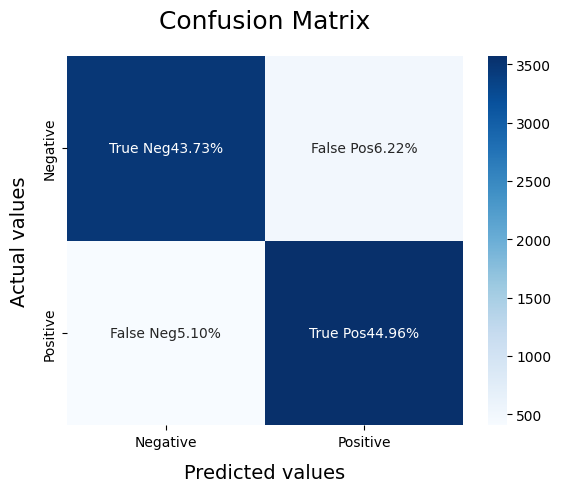

In [71]:
"""cm_logreg_bow=confusion_matrix(test_sentiments,logreg_bow_predict,labels=[1,0])
print(cm_logreg_bow)"""
cm_logreg_tfidf=confusion_matrix(y_test,logreg_tfidf_predict,labels=[1,0])
print(cm_logreg_tfidf)
cf_mat(logreg_tfidf_predict)

0.9542191188040914


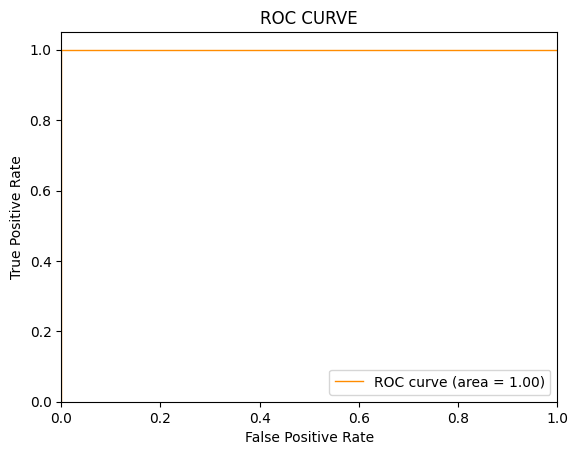

In [72]:
"""cv_prediction = model.predict_proba(cv_test_reviews)[:, 1]
cv_auc_roc_score = roc_auc_score(test_sentiments,cv_prediction)
print(cv_auc_roc_score)"""
tf_prediction = model.predict_proba(X_test)[:, 1]
tf_auc_roc_score = roc_auc_score(y_test,tf_prediction)
print(tf_auc_roc_score)
roc_curve(y_test)

# SVM model

In [73]:
from sklearn.linear_model import SGDClassifier

In [74]:
svm=SGDClassifier(max_iter=1000,random_state=48)

"""svm_bow=svm.fit(cv_train_reviews,train_sentiments)"""


svm_tfidf=svm.fit(X_train,y_train)


In [75]:
"""svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)"""

svm_tfidf_predict=svm.predict(X_test)
print(svm_tfidf_predict)

[0 1 1 ... 1 1 0]


In [76]:
"""svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)"""
svm_tfidf_score=accuracy_score(y_test,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_tfidf_score : 0.8876022655758339


[[3595  382]
 [ 511 3457]]


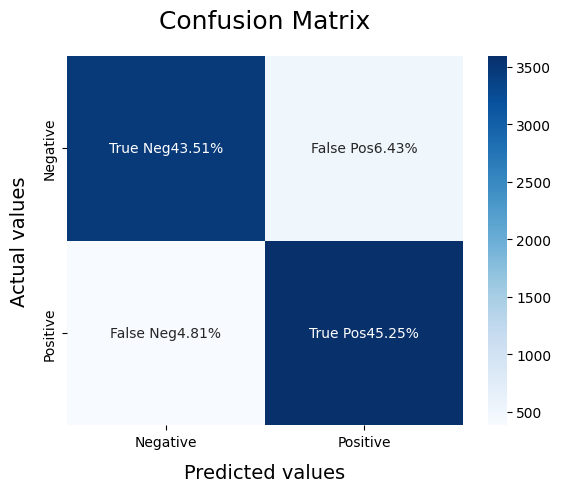

In [77]:

"""cm_svm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_svm_bow)"""

cm_svm_tfidf=confusion_matrix(y_test,svm_tfidf_predict,labels=[1,0])
print(cm_svm_tfidf)
cf_mat(svm_tfidf_predict)

In [78]:
"""svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)"""
svm_tfidf_report=classification_report(y_test,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.90      0.87      0.89      3968
    Negative       0.88      0.90      0.89      3977

    accuracy                           0.89      7945
   macro avg       0.89      0.89      0.89      7945
weighted avg       0.89      0.89      0.89      7945



In [79]:
"""cv_svm_prediction = svm.predict_proba(cv_svm_test_reviews)[:, 1]
cv_svm_auc_roc_score = roc_auc_score(test_sentiments, cv_svm_prediction)
print("CV AUC-ROC Score:", cv_svm_auc_roc_score)

tf_svm_prediction = svm.predict_proba(tf_svm_test_reviews)[:, 1]
tf_svm_auc_roc_score = roc_auc_score(test_sentiments, tf_svm_prediction)
print("TF AUC-ROC Score:", tf_svm_auc_roc_score)"""
#it throws an error as it needs a probability score but as loss = hinge probability score is not possible

'cv_svm_prediction = svm.predict_proba(cv_svm_test_reviews)[:, 1]\ncv_svm_auc_roc_score = roc_auc_score(test_sentiments, cv_svm_prediction)\nprint("CV AUC-ROC Score:", cv_svm_auc_roc_score)\n\ntf_svm_prediction = svm.predict_proba(tf_svm_test_reviews)[:, 1]\ntf_svm_auc_roc_score = roc_auc_score(test_sentiments, tf_svm_prediction)\nprint("TF AUC-ROC Score:", tf_svm_auc_roc_score)'

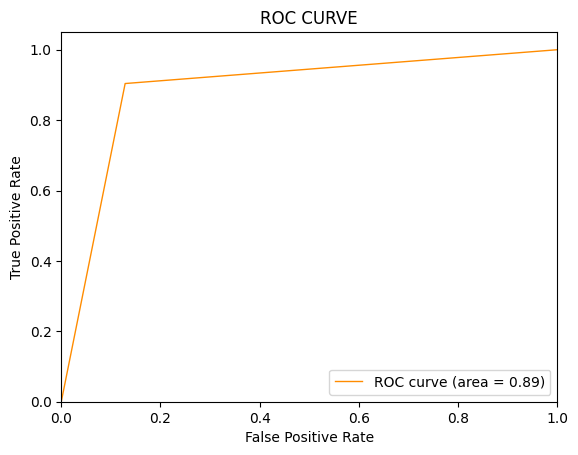

In [80]:
roc_curve(svm_tfidf_predict)

# Bernoulli Naive Bayes Model

In [81]:
from sklearn.naive_bayes import BernoulliNB

In [82]:
bnb = BernoulliNB()

In [83]:
"""bnb_bow=bnb.fit(cv_train_reviews,train_sentiments)"""
bnb_tfidf=bnb.fit(X_train,y_train)


In [84]:
"""bnb_bow_predict=bnb.predict(cv_test_reviews)
print(bnb_bow_predict)"""

bnb_tfidf_predict=bnb.predict(X_test)
print(bnb_tfidf_predict)

[0 1 1 ... 1 1 0]


In [85]:
"""bnb_bow_score=accuracy_score(test_sentiments,bnb_bow_predict)
print("bnb_bow_score :",bnb_bow_score)"""
bnb_tfidf_score=accuracy_score(y_test,bnb_tfidf_predict)
print("bnb_tfidf_score :",bnb_tfidf_score)

bnb_tfidf_score : 0.8490874764002517


[[3270  707]
 [ 492 3476]]


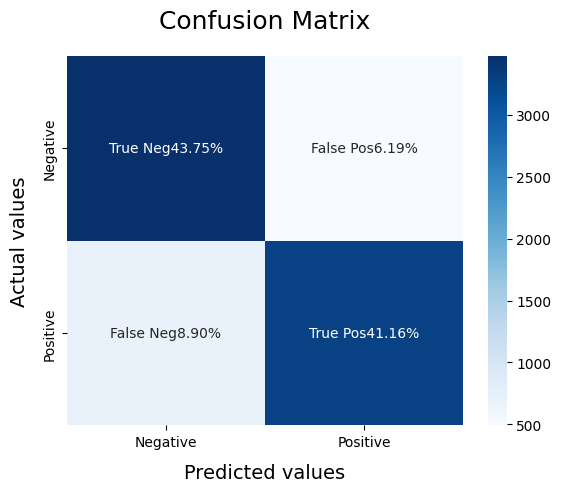

In [86]:
"""cm_bnb_bow=confusion_matrix(test_sentiments,bnb_bow_predict,labels=[1,0])
print(cm_bnb_bow)"""

cm_bnb_tfidf=confusion_matrix(y_test,bnb_tfidf_predict,labels=[1,0])
print(cm_bnb_tfidf)
cf_mat(bnb_tfidf_predict)

In [87]:
"""bnb_bow_report=classification_report(test_sentiments,bnb_bow_predict,target_names=['Positive','Negative'])
print(bnb_bow_report)"""
bnb_tfidf_report=classification_report(y_test,bnb_tfidf_predict,target_names=['Positive','Negative'])
print(bnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.83      0.88      0.85      3968
    Negative       0.87      0.82      0.85      3977

    accuracy                           0.85      7945
   macro avg       0.85      0.85      0.85      7945
weighted avg       0.85      0.85      0.85      7945



0.9227780947605992


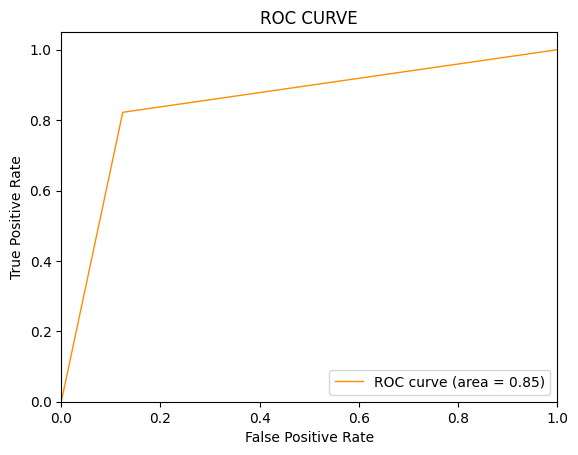

In [88]:
"""cv_bnb_prediction = bnb.predict_proba(cv_test_reviews)[:, 1]
cv_bnb_auc_roc_score = roc_auc_score(test_sentiments,cv_bnb_prediction)
print(cv_bnb_auc_roc_score)"""
tf_bnb_prediction = bnb.predict_proba(X_test)[:, 1]
tf_bnb_auc_roc_score = roc_auc_score(y_test,tf_bnb_prediction)
print(tf_bnb_auc_roc_score)
roc_curve(bnb_tfidf_predict)

# Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
max_depth = 10
rf_classifier= RandomForestClassifier(max_depth= max_depth,random_state = 42)

In [91]:
"""rf_bow=rf_classifier.fit(cv_train_reviews,train_sentiments)"""


rf_tfidf=rf_classifier.fit(X_train, y_train)

In [92]:
"""rf_bow_predict=rf_classifier.predict(cv_test_reviews)
print(rf_bow_predict)"""

rf_tfidf_predict=rf_classifier.predict(X_test)
print(rf_tfidf_predict)

[0 1 1 ... 1 1 0]


In [93]:
"""rf_bow_score=accuracy_score(test_sentiments,rf_bow_predict)
print("rf_bow_score :",rf_bow_score)"""
rf_tfidf_score=accuracy_score(y_test,rf_tfidf_predict)
print("rf_tfidf_score :",rf_tfidf_score)

rf_tfidf_score : 0.8187539332913782


[[3343  634]
 [ 806 3162]]


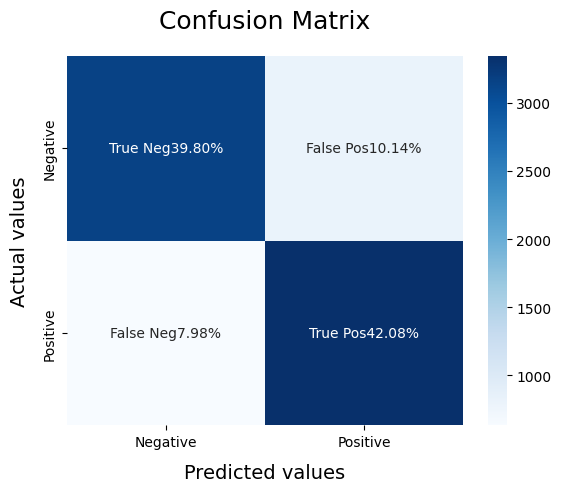

In [94]:
"""cm_rf_bow=confusion_matrix(test_sentiments,rf_bow_predict,labels=[1,0])
print(cm_rf_bow)"""

cm_rf_tfidf=confusion_matrix(y_test,rf_tfidf_predict,labels=[1,0])
print(cm_rf_tfidf)
cf_mat(rf_tfidf_predict)

In [95]:
"""rf_bow_report=classification_report(test_sentiments,rf_bow_predict,target_names=['Positive','Negative'])
print(rf_bow_report)"""
rf_tfidf_report=classification_report(y_test,rf_tfidf_predict,target_names=['Positive','Negative'])
print(rf_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.83      0.80      0.81      3968
    Negative       0.81      0.84      0.82      3977

    accuracy                           0.82      7945
   macro avg       0.82      0.82      0.82      7945
weighted avg       0.82      0.82      0.82      7945



0.8965666113418286


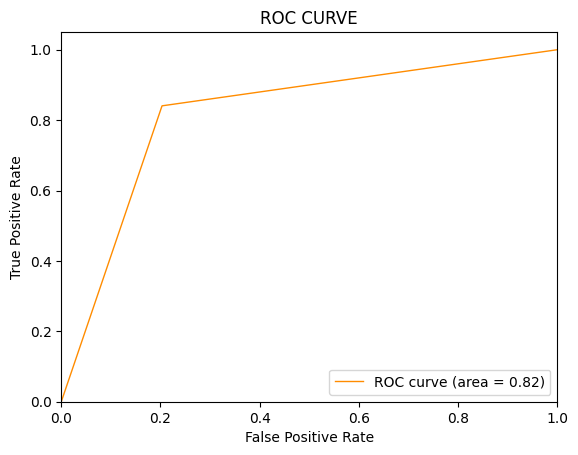

In [96]:
"""cv_rf_prediction = rf_classifier.predict_proba(cv_test_reviews)[:, 1]
cv_rf_auc_roc_score = roc_auc_score(test_sentiments,cv_rf_prediction)
print(cv_rf_auc_roc_score)"""
tf_rf_prediction = rf_classifier.predict_proba(X_test)[:, 1]
tf_rf_auc_roc_score = roc_auc_score(y_test,tf_rf_prediction)
print(tf_rf_auc_roc_score)
roc_curve(rf_tfidf_predict)

In [97]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [106]:
model_neural = Sequential()
model_neural.add(Dense(32, activation='relu'))
model_neural.add(Dense(1, activation='sigmoid'))
model_neural.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model_neural.fit(X_train,np.array(y_train),epochs=10, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))
model_neural.fit(X_train, np.array(y_train), epochs=10, batch_size=32, validation_data=(X_test, np.array(y_test)))

Epoch 1/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.8275 - loss: 0.4728 - val_accuracy: 0.8928 - val_loss: 0.2542
Epoch 2/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9551 - loss: 0.1353 - val_accuracy: 0.8936 - val_loss: 0.2634
Epoch 3/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9855 - loss: 0.0618 - val_accuracy: 0.8856 - val_loss: 0.2958
Epoch 4/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9954 - loss: 0.0279 - val_accuracy: 0.8799 - val_loss: 0.3353
Epoch 5/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9986 - loss: 0.0133 - val_accuracy: 0.8779 - val_loss: 0.3767
Epoch 6/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9993 - loss: 0.0060 - val_accuracy: 0.8770 - val_loss: 0.4178
Epoch 7/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.9996 - loss: 0.0029 - val_accuracy: 0.8740 - val_loss: 0.4534
Epoch 8/10
994/994 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9999 - loss: 0.0014 - 

In [107]:
neural_pred = model_neural.predict(X_test)
nn_pred = (neural_pred > 0.5).astype("int32")

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [108]:
print(accuracy_score(y_test, nn_pred))

0.8706104468219006


In [109]:
print(classification_report(y_test, nn_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      3968
           1       0.87      0.87      0.87      3977

    accuracy                           0.87      7945
   macro avg       0.87      0.87      0.87      7945
weighted avg       0.87      0.87      0.87      7945



[[3477  500]
 [ 528 3440]]


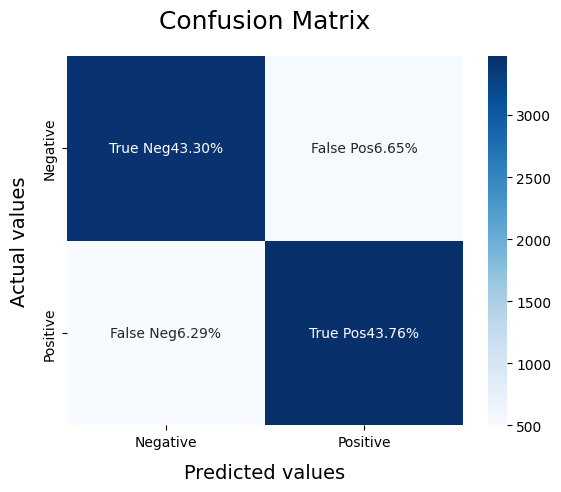

In [110]:
cm_nn_tfidf=confusion_matrix(y_test,nn_pred,labels=[1,0])
print(cm_nn_tfidf)
cf_mat(nn_pred)

0.8706062885786823


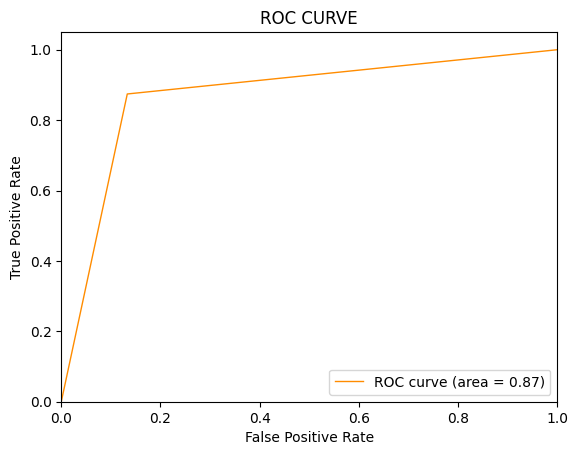

In [112]:

nn_auc_roc_score = roc_auc_score(y_test,nn_pred)
print(nn_auc_roc_score)
roc_curve(nn_pred)

In [100]:
#refrences
"""1.kaggle
2.youtube channel campusX
3.some articles on google
4.sklearn documentaion
5.gfg"""

'1.kaggle\n2.youtube channel campusX\n3.some articles on google\n4.sklearn documentaion\n5.gfg'